In [1]:
import pandas as pd

file_path = '/content/Cardiotocographic.csv'
df = pd.read_csv(file_path)

df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

data_types = df.dtypes
print("\nData types:\n", data_types)

# Statistical summary
summary_before = df.describe()
print("\nStatistical summary before handling outliers:\n", summary_before)


Missing values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Data types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Statistical summary before handling outliers:
                 LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000   

In [3]:
# Impute missing values using the median of each column
df.fillna(df.median(), inplace=True)

# Clipping negative and extreme values based on domain knowledge
df['LB'] = df['LB'].clip(lower=100, upper=200)
df['AC'] = df['AC'].clip(lower=0, upper=0.03)
df['FM'] = df['FM'].clip(lower=0)
df['UC'] = df['UC'].clip(lower=0, upper=0.03)
df['DL'] = df['DL'].clip(lower=0, upper=0.03)
df['DS'] = df['DS'].clip(lower=0, upper=0.002)
df['DP'] = df['DP'].clip(lower=0, upper=0.01)
df['ASTV'] = df['ASTV'].clip(lower=0, upper=100)
df['MSTV'] = df['MSTV'].clip(lower=0, upper=10)
df['ALTV'] = df['ALTV'].clip(lower=0, upper=100)
df['MLTV'] = df['MLTV'].clip(lower=0, upper=50)
df['Width'] = df['Width'].clip(lower=0, upper=200)
df['Tendency'] = df['Tendency'].clip(lower=0, upper=3)
df['NSP'] = df['NSP'].clip(lower=1, upper=5)

# Statistical summary after handling missing values and outliers
summary_after = df.describe()
print("\nStatistical summary after handling missing values and outliers:\n", summary_after)



Statistical summary after handling missing values and outliers:
                 LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.390989     0.003217     0.011275     0.004419     0.001938   
std      10.467899     0.004084     0.062290     0.003239     0.003203   
min     100.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     200.000000     0.030000     0.961268     0.030000     0.030000   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000006     0.000182    46.998336     1.361180    10.150709   
std       0.000095     0.000775    17.498126 

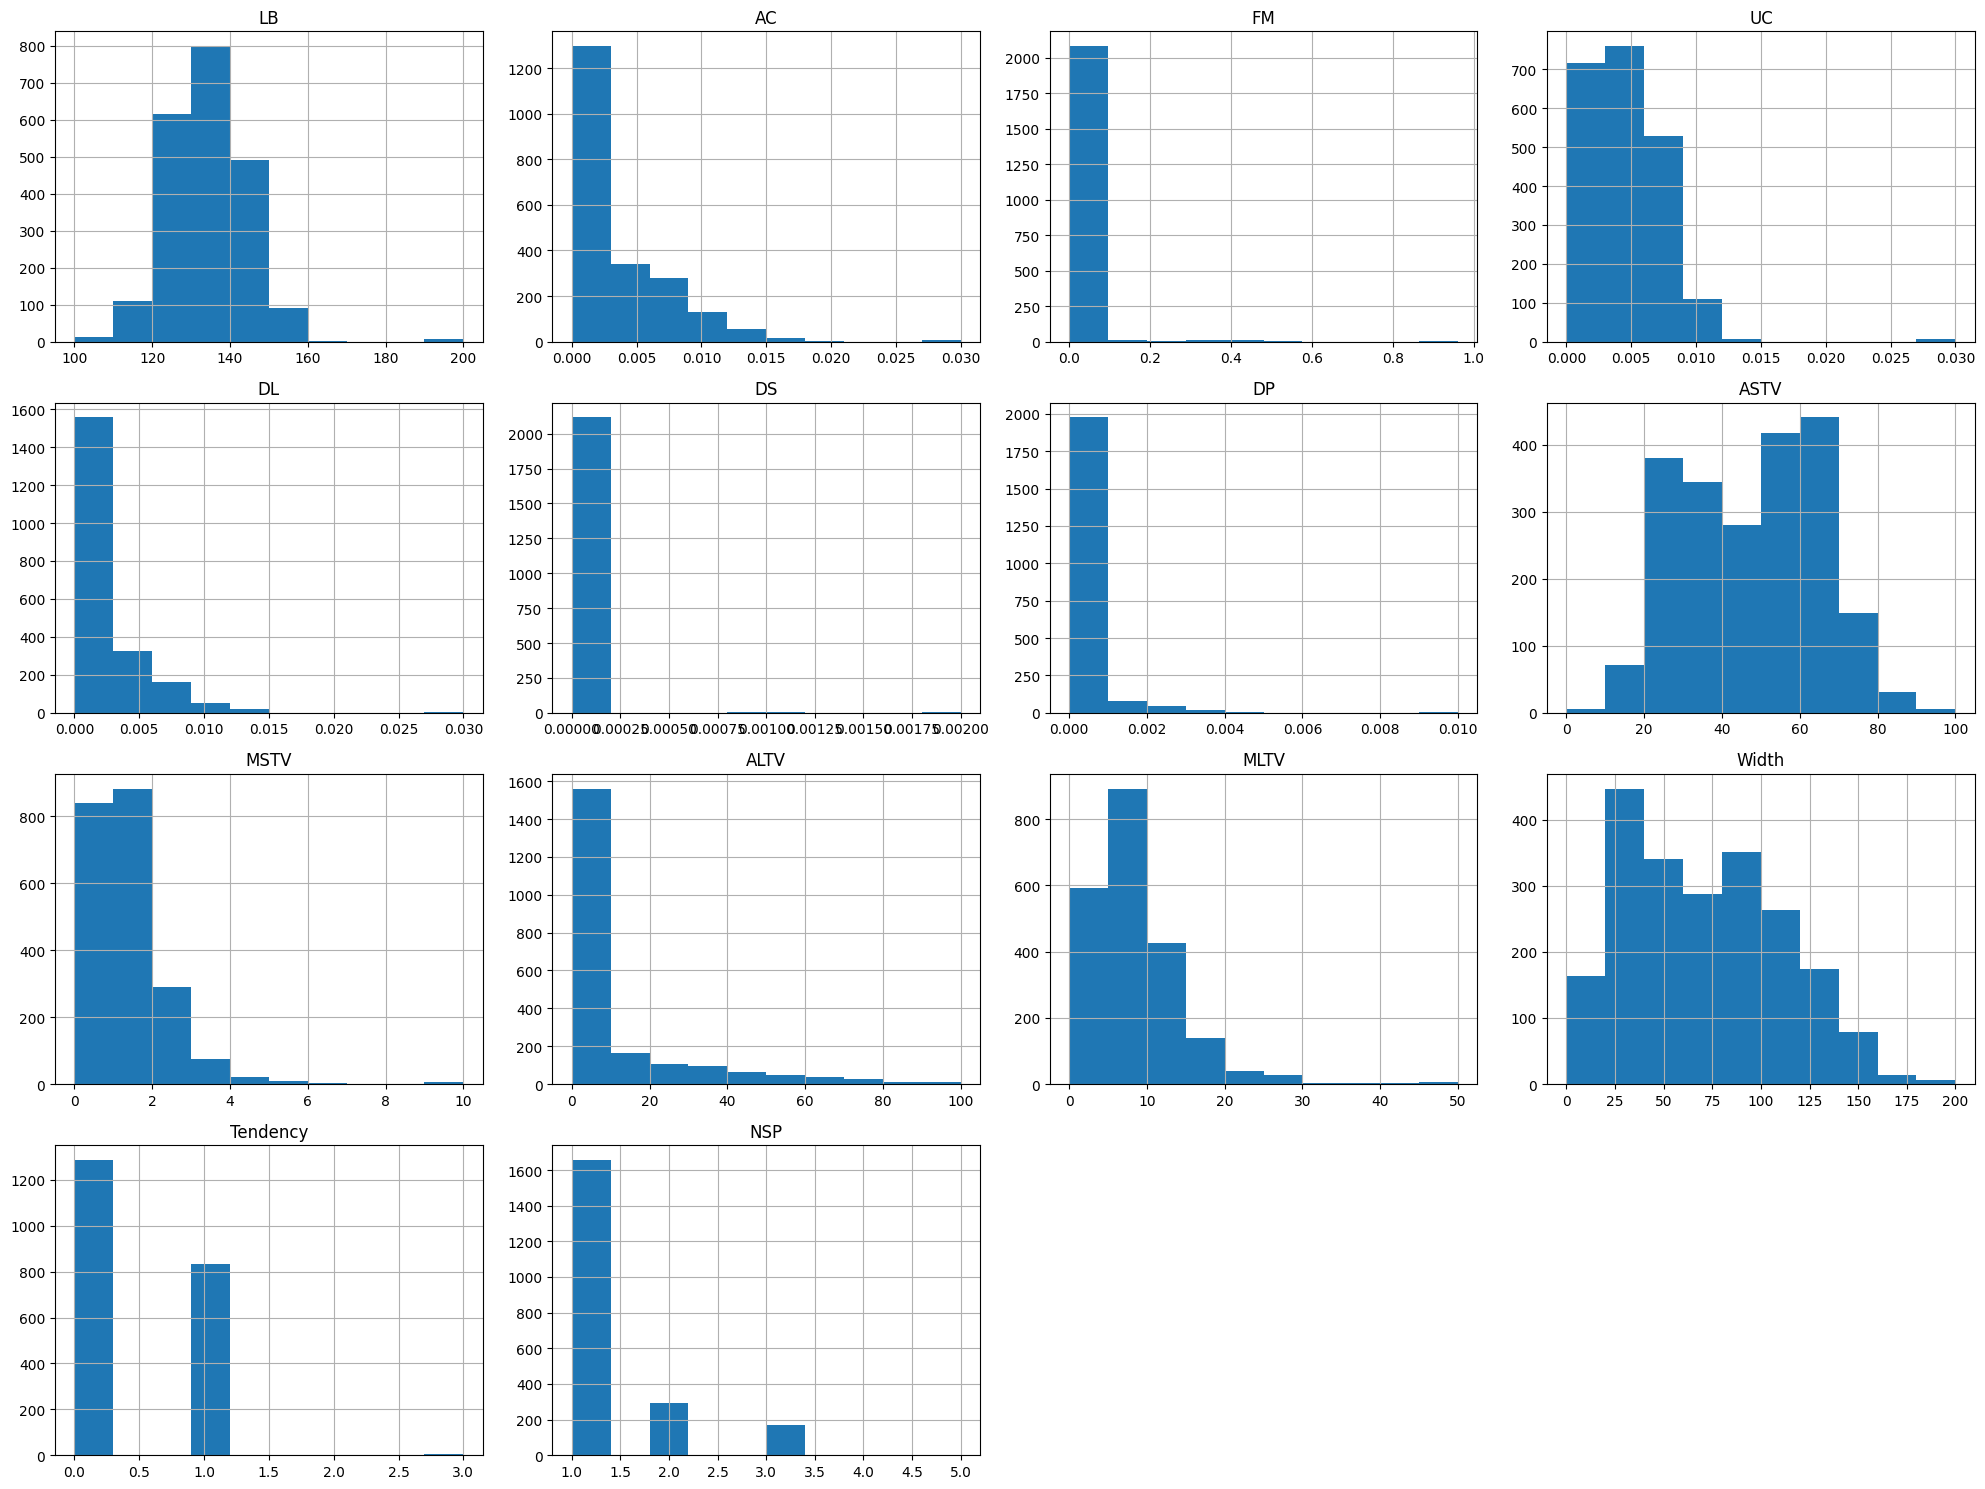

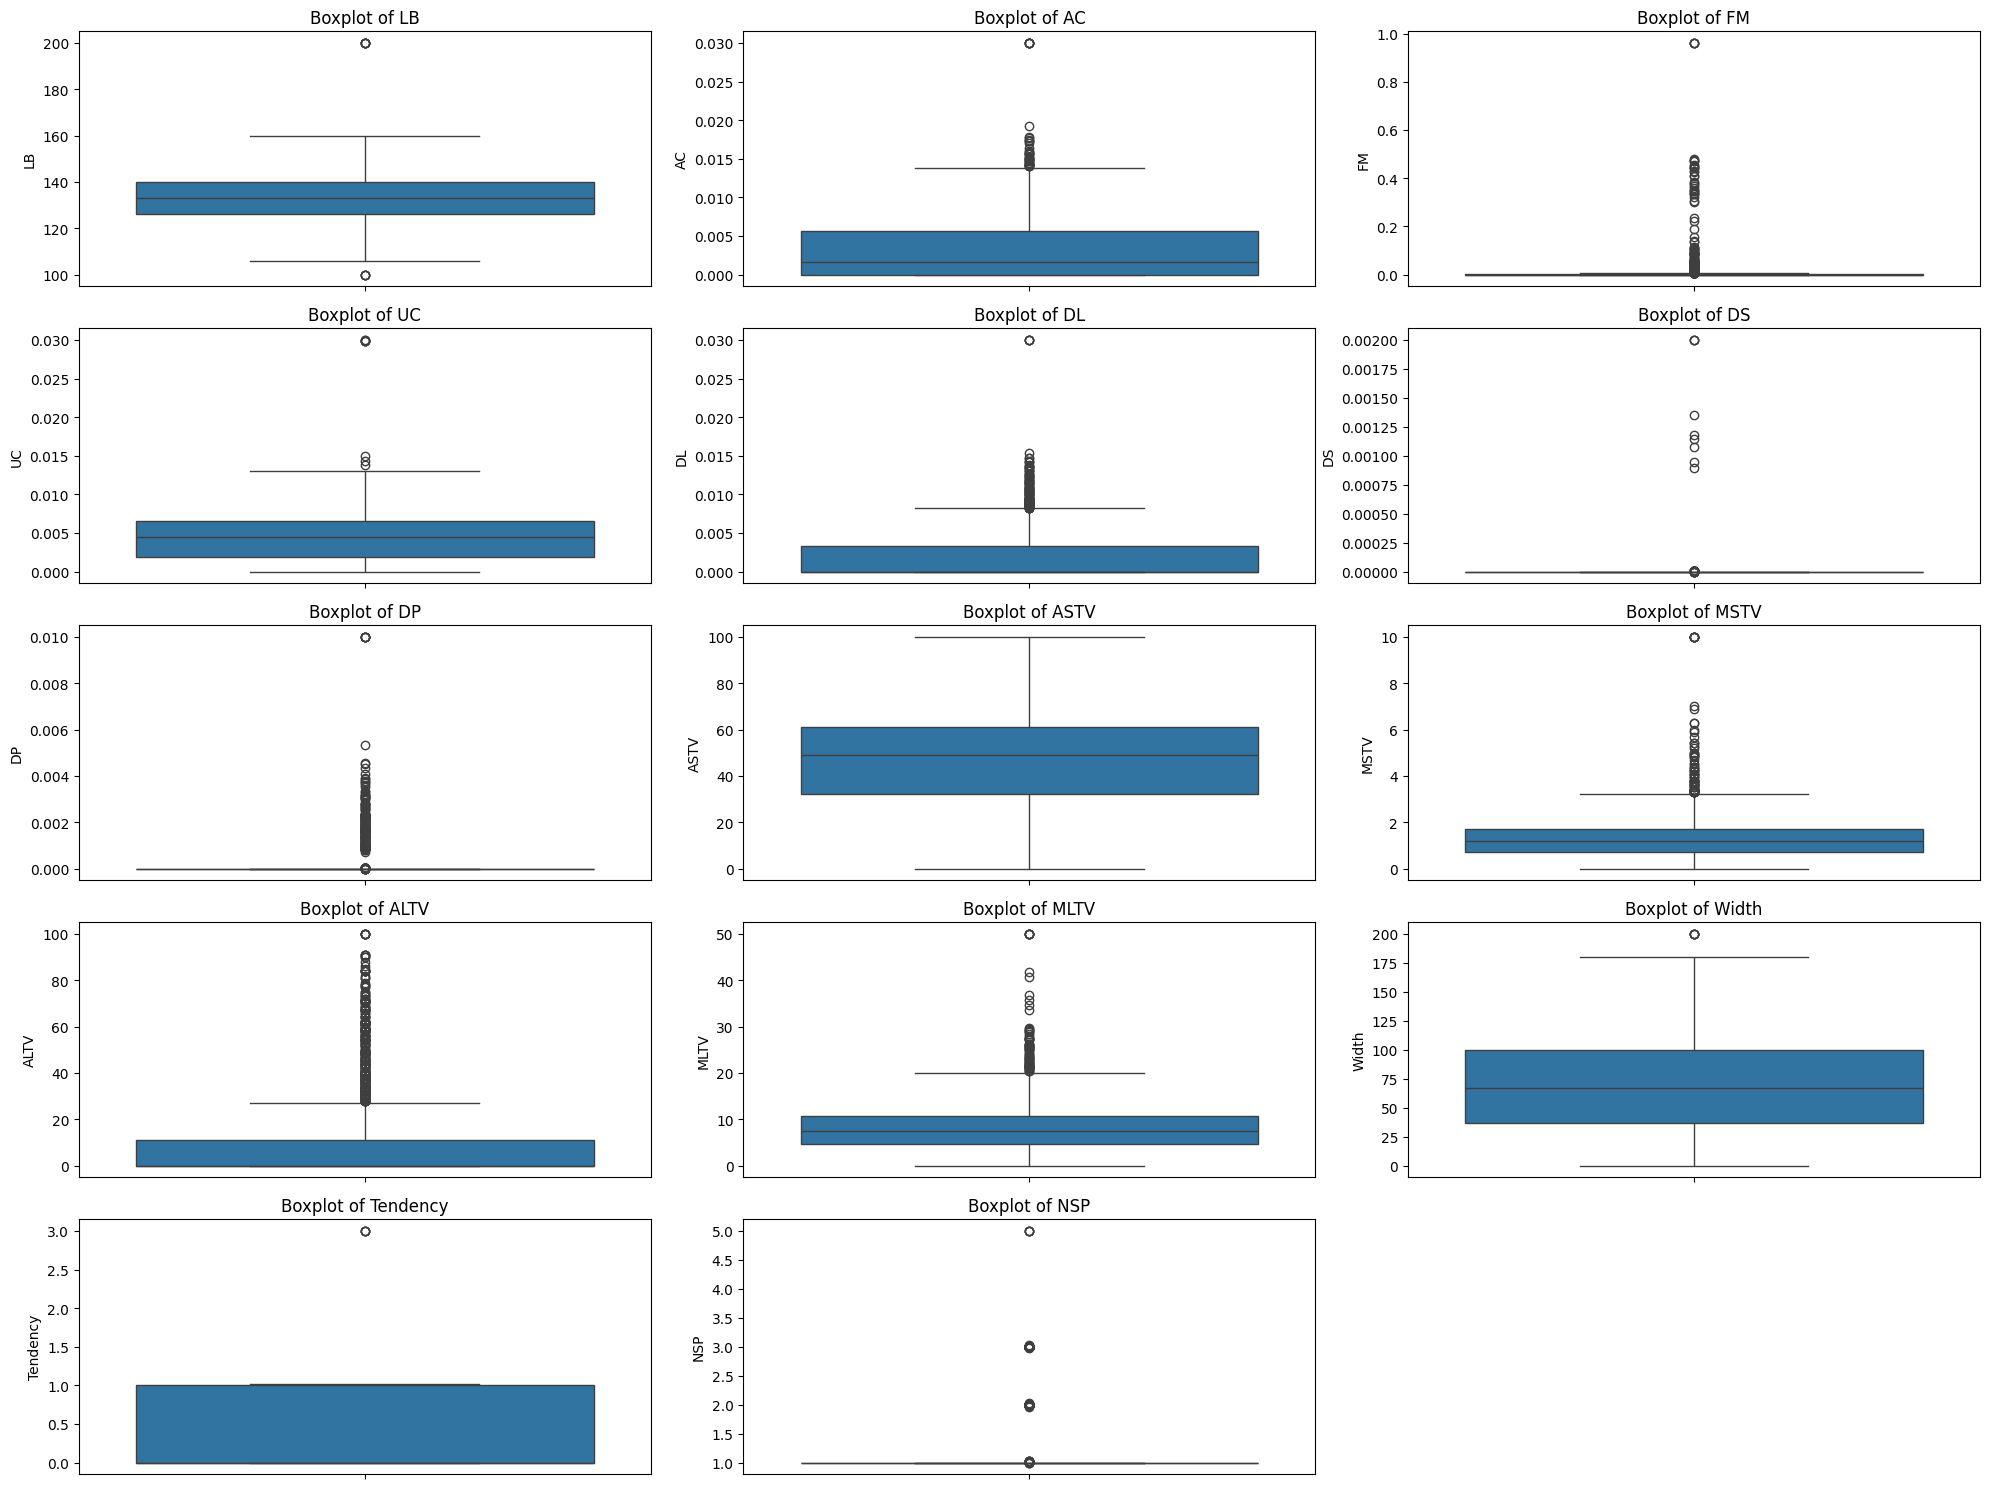

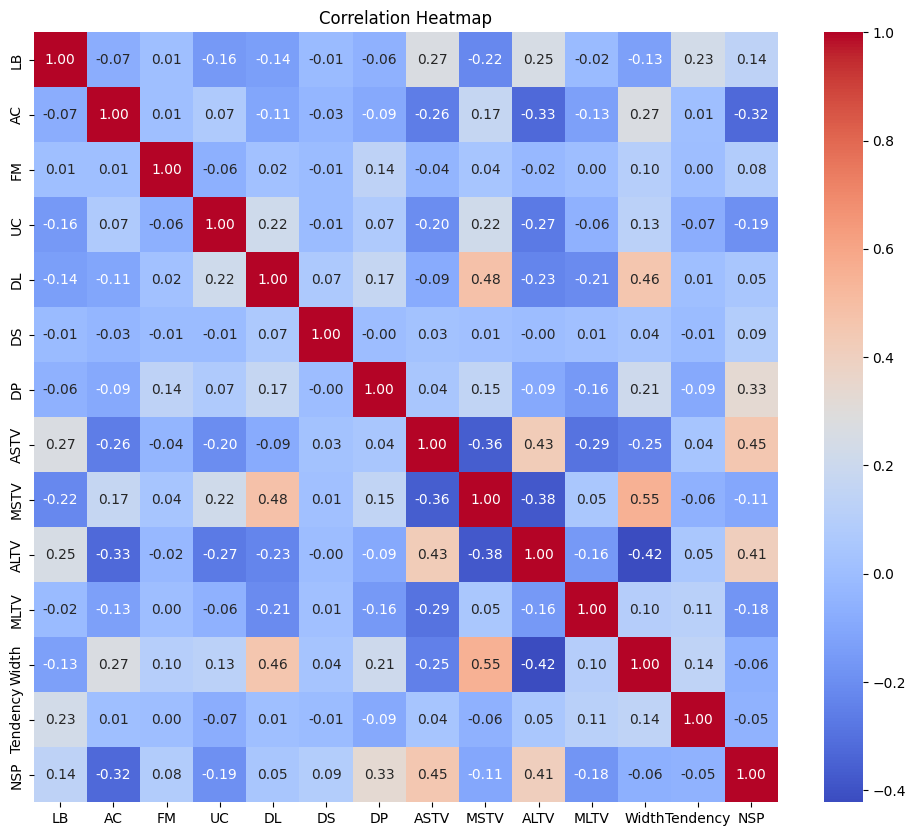

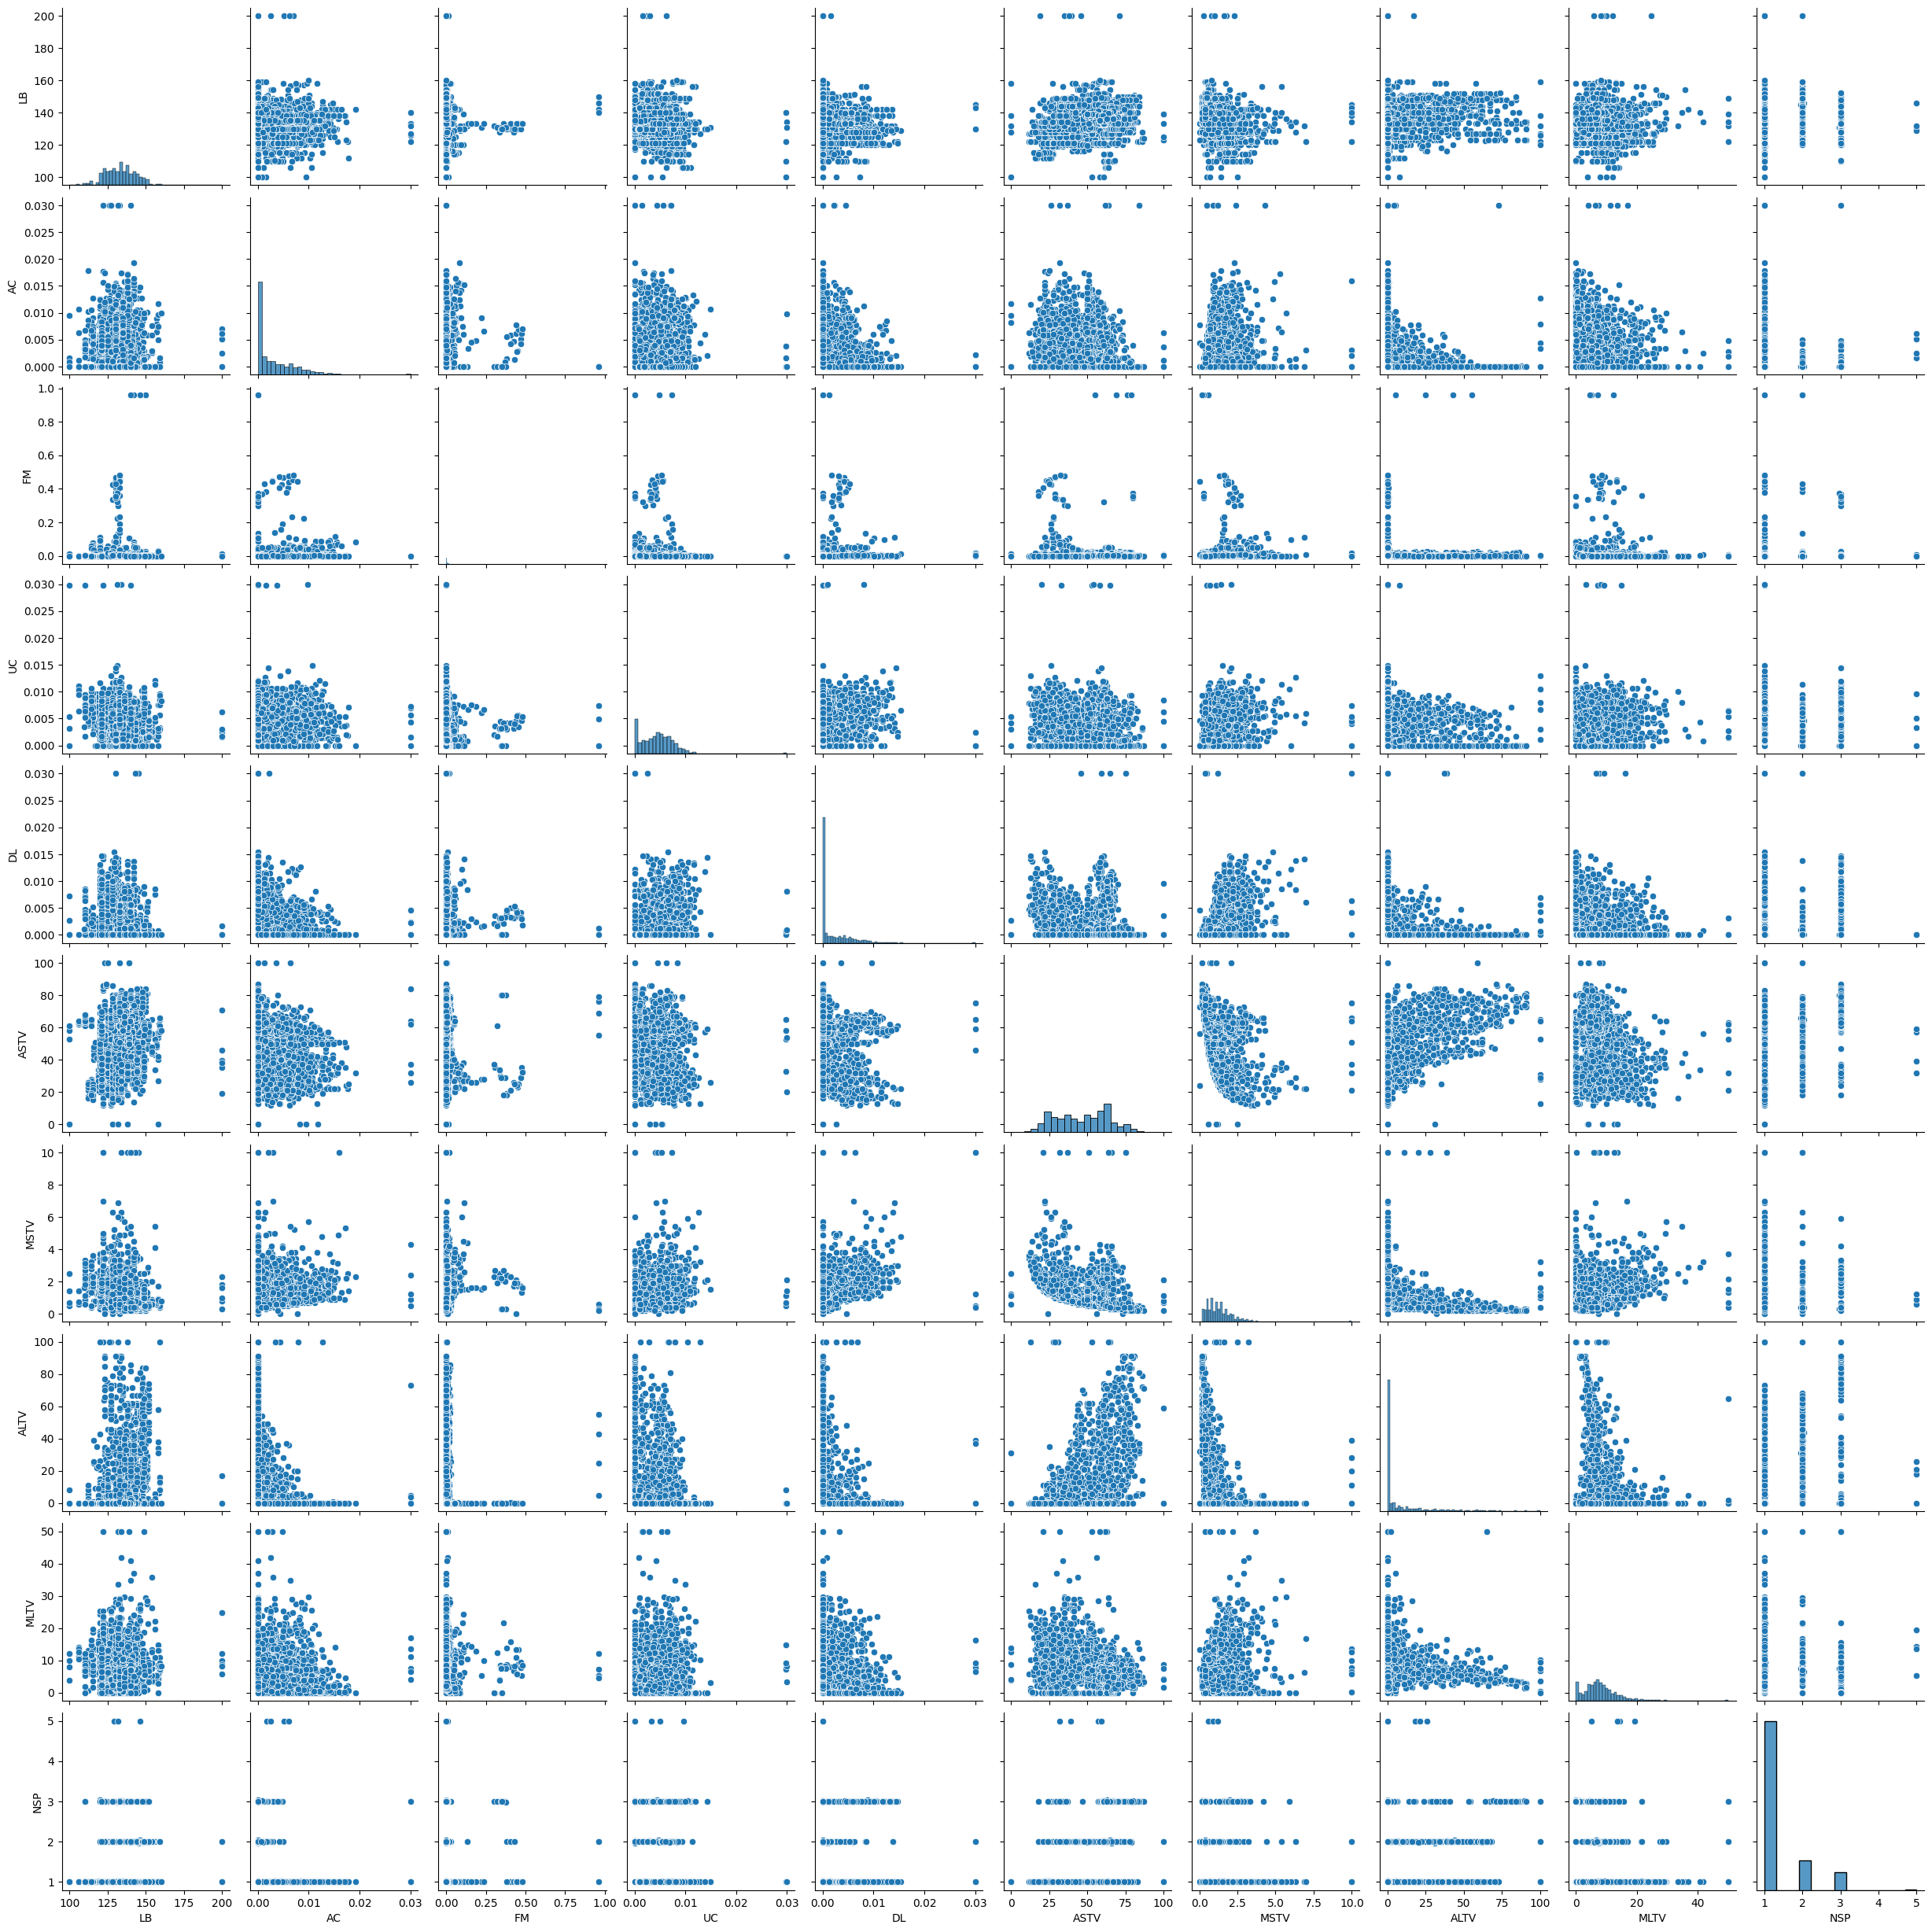

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

# Boxplots to visualize the distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot for selected variables
sns.pairplot(df[['LB', 'AC', 'FM', 'UC', 'DL', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'NSP']])
plt.show()


In [5]:
#Conclusions
"""The high percentage of abnormal short-term and long-term variability (ASTV and ALTV) could indicate potential issues with fetal well-being.
 Healthcare providers might use these insights to prioritize monitoring and potential interventions.
Low-frequency accelerations and uterine contractions suggest that these events, while less common, should be closely monitored when they do occur.
A correlation heatmap indicates several notable relationships between variables.
For example, ASTV and ALTV are positively correlated, suggesting that periods of abnormal short-term variability often coincide with abnormal long-term variability.
Overall, this exploratory data analysis provides a solid foundation for understanding the dataset's structure and identifying key variables and relationships.
These insights can guide further clinical decision-making """

"The high percentage of abnormal short-term and long-term variability (ASTV and ALTV) could indicate potential issues with fetal well-being.\n Healthcare providers might use these insights to prioritize monitoring and potential interventions.\nLow-frequency accelerations and uterine contractions suggest that these events, while less common, should be closely monitored when they do occur.\nA correlation heatmap indicates several notable relationships between variables.\nFor example, ASTV and ALTV are positively correlated, suggesting that periods of abnormal short-term variability often coincide with abnormal long-term variability.\nOverall, this exploratory data analysis provides a solid foundation for understanding the dataset's structure and identifying key variables and relationships. \nThese insights can guide further clinical decision-making "